Stock Price prediction using Linear Regression
--------------------

----------------------
Let's import needed libraries

In [13]:
import numpy as np
import pandas as pd
import datetime
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

------------
Importing needed .CSV file

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/sridarah/majaamatrix/main/K_Regression_Metrics/data/sap_stock.csv')

In [9]:
df.head()

,Date,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
0,2009-03-09,25.16,25.82,24.48,25.59,NaN,5749357.0,145200289.0,NaN,NaN,NaN
1,2009-03-10,25.68,26.95,25.68,26.87,NaN,7507770.0,198480965.0,NaN,NaN,NaN
2,2009-03-11,26.50,26.95,26.26,26.64,NaN,5855095.0,155815439.0,NaN,NaN,NaN
3,2009-03-12,26.15,26.47,25.82,26.18,NaN,6294955.0,164489409.0,NaN,NaN,NaN
4,2009-03-13,26.01,26.24,25.65,25.73,NaN,6814568.0,176228331.0,NaN,NaN,NaN


In [15]:
# Lets get information about each coloumns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2550 non-null   object 
 1   Open                   2242 non-null   float64
 2   High                   2543 non-null   float64
 3   Low                    2543 non-null   float64
 4   Close                  2550 non-null   float64
 5   Change                 11 non-null     float64
 6   Traded Volume          2504 non-null   float64
 7   Turnover               2497 non-null   float64
 8   Last Price of the Day  0 non-null      float64
 9   Daily Traded Units     0 non-null      float64
 10  Daily Turnover         7 non-null      float64
dtypes: float64(10), object(1)
memory usage: 219.3+ KB


In [19]:
# Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume',
       'Turnover', 'Last Price of the Day', 'Daily Traded Units',
       'Daily Turnover'],
      dtype='object')

In [23]:
df.isna().values.any()

True

---------------------
Let's create dataframe contains date and closing amount

In [26]:
data = pd.DataFrame(df, columns=['Date', 'Close'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2550 non-null   object 
 1   Close   2550 non-null   float64
dtypes: float64(1), object(1)
memory usage: 40.0+ KB


------------------------
Explore Data

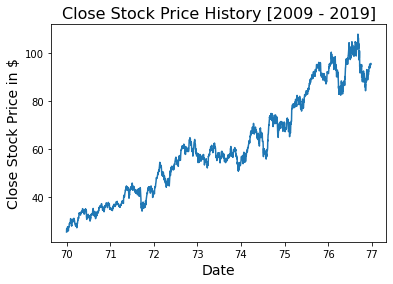

In [36]:
import matplotlib.dates as mdates

years = mdates.YearLocator()
yearsFmt = mdates.DateFormatter('%y')

fig, ax = plt.subplots()
ax.plot(data['Date'], data['Close'])

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

plt.title("Close Stock Price History [2009 - 2019]", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel('Close Stock Price in $', fontsize = 14)

plt.show()

-----------------------------------
Training a Linear Regression Model

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [44]:
x = data.loc[:,"Date"]
y = data.loc[:,"Close"]
print("Dimenstion of X : {}".format(x.shape))
print("Dimenstion of Y : {}".format(y.shape))

Dimenstion of X : (2550,)
Dimenstion of Y : (2550,)


In [58]:
train, text = train_test_split(data, test_size = 0.2)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)
X_train = np.array(X_train.index).reshape(-1,1)
X_test = np.array(X_test.index).reshape(-1,1)
print("Shape of X_train : {}".format(X_train.shape))
print("Shape of X_test : {}".format(X_test.shape))
print("Shape of Y_train : {}".format(Y_train.shape))
print("Shape of Y_test : {}".format(Y_test.shape))

Shape of X_train : (2040, 1)
Shape of X_test : (510, 1)
Shape of Y_train : (2040,)
Shape of Y_test : (510,)


In [57]:
model = LinearRegression()

In [59]:
model.fit(X_train, Y_train)

LinearRegression()

-------------------
Model Evaluation

In [64]:
# coefficient
print("Slope :", np.asscalar(np.squeeze(model.coef_)))

#Intercept 
print("Intercept : ", model.intercept_)

Slope : 0.027722504683192425
Intercept :  25.76662421193079


<ipython-input-64-7f9366b2706e>:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print("Slope :", np.asscalar(np.squeeze(model.coef_)))


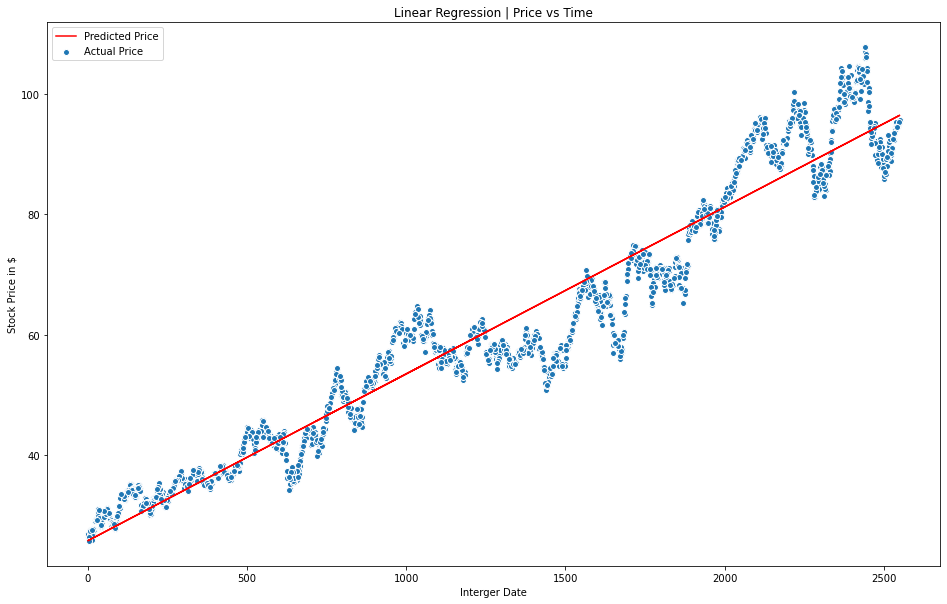

In [67]:
#Train set graph 

plt.figure(1, figsize=(16,10))
plt.scatter(X_train, Y_train, edgecolor = 'w', label = 'Actual Price')
plt.plot(X_train, model.predict(X_train), color = 'r', label = 'Predicted Price')

plt.title("Linear Regression | Price vs Time")
plt.xlabel("Interger Date")
plt.ylabel("Stock Price in $")

plt.legend()
plt.show()

----------------
Prediction from model created

In [68]:
Y_predicted = model.predict(X_test)

---------------------
lets have a look how the predictded values vary with actual values.

In [70]:
randints = np.random.randint(2550, size = 25)

data_sample = data[data.index.isin(randints)]
sample_predicted = model.predict(np.array(data_sample.index).reshape(-1,1))
data_sample["Prediction"] = sample_predicted

data_sample.head()

<ipython-input-70-116b962d69b7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sample["Prediction"] = sample_predicted


,Date,Close,Prediction
55,2009-05-25,30.13,27.291362
190,2009-11-30,31.82,31.033900
194,2009-12-04,31.11,31.144790
493,2011-02-02,43.01,39.433819
640,2011-08-30,37.14,43.509027


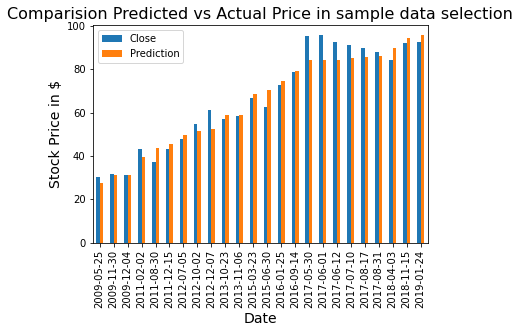

In [71]:
fig,ax = plt.subplots()

data_sample.plot(x = 'Date', y = ['Close', 'Prediction'], kind = 'bar', ax = ax)

plt.title("Comparision Predicted vs Actual Price in sample data selection", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Stock Price in $", fontsize = 14)

plt.show()

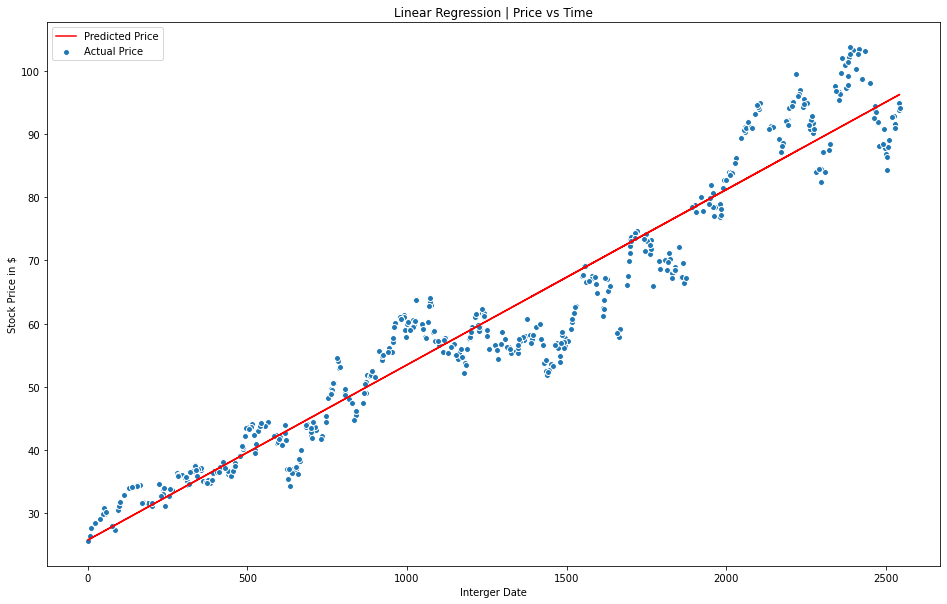

In [72]:
#plot fitted line, Y_test

plt.figure(1, figsize=(16,10))
plt.scatter(X_test, Y_test, edgecolor = 'w', label = 'Actual Price')
plt.plot(X_test, model.predict(X_test), color = 'r', label = 'Predicted Price')

plt.title("Linear Regression | Price vs Time")
plt.xlabel("Interger Date")
plt.ylabel("Stock Price in $")

plt.legend()
plt.show()

Text(0.5, 1.0, 'Predicted vs Actual Price in $')

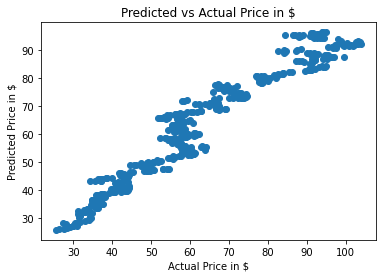

In [73]:
#plot predicted vs actual price 

plt.scatter(Y_test, Y_predicted)

plt.xlabel("Actual Price in $")
plt.ylabel("Predicted Price in $")
plt.title("Predicted vs Actual Price in $")

plt.show()


-----------------
Residual Histogram

/home/kova/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


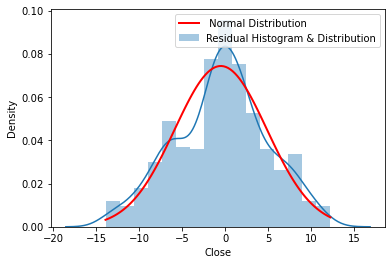

In [76]:
from scipy.stats import norm 

mu, std = norm.fit(Y_test - Y_predicted)

ax = sns.distplot((Y_test - Y_predicted), label = "Residual Histogram & Distribution")

x = np.linspace(min(Y_test - Y_predicted), max(Y_test - Y_predicted), 100)
p = norm.pdf(x, mu,std)

ax.plot(x, p, 'r', lw = 2, label = " Normal Distribution ")
plt.legend()
plt.show()